# **Getting All Tweets**


In [ ]:
import pandas as pd
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
from nltk.stem.snowball import SnowballStemmer, PorterStemmer
from collections import Counter


In [ ]:
Global_Tweets = pd.read_csv('/content/drive/MyDrive/1 Work Life Balance/All_Tweet.csv')
Global_Tweets.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Thu May 07 18:21:32 +0000 2020,itsthelittlethings,NaN,NaN,5,1258461981989797900,NaN,NaN,NaN,...,407,613,3,"Norwich, England",💛💚Sarah💚💛,sarahlucy123,5442,NaN,NaN,False
1,NaN,Mon May 04 19:51:24 +0000 2020,hometasking hometasking14,https://twitter.com/PayneTrain_MI/status/1257397436902932494/video/1,NaN,48,1257397436902932494,AlexHorne,1.257219e+18,2.019879e+07,...,41,23,0,Michigan,PayneTrain (the Paynes),PayneTrain_MI,227,NaN,NaN,False
2,NaN,Wed May 20 23:44:15 +0000 2020,NaN,NaN,https://www.brookings.edu/blog/up-front/2020/05/13/incomes-have-crashed-how-much-has-unemployment-insurance-helped/,42,1263254237838016515,RepDonBeyer,1.263254e+18,2.962868e+09,...,107073,4656,1557,Northern Virginia & DC,Rep. Don Beyer,RepDonBeyer,31261,NaN,http://beyer.house.gov,True
3,NaN,Mon May 04 23:15:04 +0000 2020,NaN,NaN,NaN,3,1257448688802201612,NaN,NaN,NaN,...,1494,1470,4,"Baltimore, MD",Darius,_Darius7,77945,NaN,NaN,False
4,NaN,Thu Apr 30 21:50:40 +0000 2020,NaN,NaN,http://ow.ly/vtZ530qC9eg,23,1255977896981790723,NaN,NaN,NaN,...,234891,7935,2236,United States,Lee Strobel,LeeStrobel,26652,NaN,NaN,True


## **Getting Indian Tweets**

In [ ]:
Indian_Tweets = Global_Tweets[Global_Tweets.place.str.contains('India|Bharat|Delhi|Mumbai|Abohar |Achalpur |Adilabad |Adityapur |Adoni |Agartala |Agra |Ahmedabad |Ahmadnagar |Aizawl |Ajmer |Akbarpur |Akola |Alandur |Alappuzha |Aligarh |Allahabad |Alwar |Ambala |Ambala Sadar |Ambarnath |Ambattur |Ambikapur |Ambur |Amravati |Amreli |Amritsar |Amroha |Anand |Anantapur |Anantnag |Arrah |Asansol |Ashoknagar Kalyangarh |Aurangabad |Aurangabad |Avadi |Azamgarh |Badlapur |Bagaha |Bagalkot |Bahadurgarh |Baharampur |Bahraich |Baidyabati |Baleshwar Town |Ballia |Bally |Bally City|Balurghat |Banda |Bankura |Bansberia |Banswara |Baran |Baranagar |Barasat |Baraut |Barddhaman |Bareilly |Baripada Town |Barnala |Barrackpur |Barshi |Basirhat |Basti |Batala |Bathinda |Beawar |Begusarai |Belgaum |Bellary |Bengaluru|Bettiah |Betul |Bhadrak |Bhadravati |Bhadreswar |Bhagalpur |Bhalswa Jahangir Pur |Bharatpur |Bharuch |Bhatpara |Bhavnagar |Bhilai Nagar |Bhilwara |Bhimavaram |Bhind |Bhiwadi |Bhiwandi |Bhiwani |Bhopal |Bhubaneswar Town |Bhuj |Bhusawal |Bid |Bidar |Bidhan Nagar |Biharsharif |Bijapur |Bikaner |Bilaspur |Bokaro Steel City |Bongaon |Botad |Brahmapur Town |Budaun |Bulandshahr |Bundi |Burari |Burhanpur |Buxar |Champdani |Chandannagar |Chandausi |Chandigarh |Chandrapur |Chapra |Chas |Chennai |Chhattarpur |Chhindwara |Chikmagalur |Chilakaluripet |Chitradurga |Chittaurgarh |Chittoor |Churu |Coimbatore |Cuddalore |Cuttack |Dabgram |Dallo Pura |Damoh |Darbhanga |Darjiling |Datia |Delhi |Davanagere |Deesa |Dehradun |Dehri |Delhi |Delhi Cantonment |Deoghar |Deoli |Deoria |Dewas |Dhanbad |Dharmavaram |Dhaulpur |Dhule |Dibrugarh |Dimapur |Dinapur Nizamat |Dindigul |Dum Dum |Durg |Durgapur |Eluru |English Bazar |Erode |Etah |Etawah |Faizabad |Faridabad |Farrukhabad-cum-Fatehgarh |Fatehpur |Firozabad |Firozpur |Gadag-Betigeri |Gandhidham |Gandhinagar |Ganganagar |Gangapur City |Gangawati |Gaya |Ghazipur |Giridih |Godhra |Gokal Pur |Gonda |Gondal |Gondiya |Gorakhpur |Hyderabad |Mumbai |Greater Noida |Noida|Gudivada |Gulbarga |Guna |Guntakal |Guntur |Gurgaon |Guwahati |Gwalior |Habra |Hajipur |Haldia |Haldwani-cum-Kathgodam |Halisahar |Hanumangarh |Haora |Hapur |Hardoi |Hardwar |Hassan |Hastsal |Hathras |Hazaribag |Hindaun |Hindupur |Hinganghat |Hisar |Hoshangabad |Hoshiarpur |Hospet |Hosur |Hubli-Dharwad |Hugli-Chinsurah |Ichalkaranji |Imphal |Indore |Jabalpur |Jagadhri |Jagdalpur |Jaipur |Jalandhar |Jalgaon |Jalna |Jalpaiguri |Jamalpur |Jammu |Jamnagar |Jamshedpur |Jamuria |Jaunpur |Jehanabad |Jetpur Navagadh |Jhansi |Jhunjhunun |Jind |Jodhpur |Junagadh |Kadapa |Kaithal |Kakinada |Kalol |Kalyani |Kamarhati |Kancheepuram |Kanchrapara |Kanpur |Kanpur City|Karaikkudi |Karawal Nagar |Karimnagar |Karnal |Kasganj |Kashipur |Katihar |Khammam |Khandwa |Khanna |Kharagpur |Khardaha |Khargone |Khora |Khurja |Kirari Suleman Nagar |Kishanganj |Kishangarh |Kochi |Kolar |Kolhapur |Kolkata |Kollam |Korba |Kota |Kozhikode |Krishnanagar |Kulti |Kumbakonam |Kurichi |Kurnool |Lakhimpur |Lalitpur |Latur |Loni |Lucknow |Ludhiana |Machilipatnam |Madanapalle |Madavaram |Madhyamgram |Madurai |Mahbubnagar |Mahesana |Maheshtala |Mainpuri |Malegaon |Malerkotla |Mandoli |Mandsaur |Mandya |Mangalore |Mango |Mathura |Maunath Bhanjan |Medinipur |Meerut |Mira Bhayander |Miryalaguda |Mirzapur-cum-Vindhyachal |Modinagar |Moga |Moradabad |Morena |Morvi |Motihari |Mughalsarai |Muktsar |Munger |Murwara |Mustafabad |Muzaffarnagar |Muzaffarpur |Mysore |Nabadwip |Nadiad |Nagaon |Nagapattinam |Nagaur |Nagda |Nagercoil |Nagpur |Naihati |Nalgonda |Nanded Waghala |Nandurbar |Nandyal |Nangloi Jat |Narasaraopet |Nashik |Navi Mumbai |Navi Mumbai Panvel Raigarh |Navsari |Neemuch |Nellore |New Delhi |Neyveli |Nizamabad |Noida |North Barrackpur |North Dum Dum |Ongole |Orai |Osmanabad |Ozhukarai |Palakkad |Palanpur |Pali |Pallavaram |Palwal |Panchkula |Panihati |Panipat |Panvel |Parbhani |Patan |Pathankot |Patiala |Patna |Pilibhit |Pimpri Chinchwad |Pithampur |Porbandar |Port Blair |Proddatur |Puducherry |Pudukkottai |Pune |Puri |Purnia |Puruliya |Rae Bareli |Raichur |Raiganj |Raigarh |Raipur |Rajahmundry |Rajapalayam |Rajarhat Gopalpur |Rajkot |Rajnandgaon |Rajpur Sonarpur |Ramagundam |Rampur |Ranchi |Ranibennur |Raniganj |Ratlam |Raurkela Industrial Township |Raurkela Town |Rewa |Rewari |Rishra |Robertson Pet |Rohtak |Roorkee |Rudrapur |S.A.S. Nagar |Sagar |Saharanpur |Saharsa |Salem |Sambalpur |Sambhal |Sangli Miraj Kupwad |Santipur |Sasaram |Satara |Satna |Sawai Madhopur |Secunderabad |Sehore |Seoni |Serampore |Shahjahanpur |Shamli |Shikohabad |Shillong |Shimla |Shimoga |Shivpuri |Sikar |Silchar |Siliguri |Singrauli |Sirsa |Sitapur |Siwan |Solapur |Sonipat |South Dum Dum |Srikakulam |Srinagar |Sujangarh |Sultan Pur Majra |Sultanpur |Surat |Surendranagar Dudhrej |Suryapet |Tadepalligudem |Tadpatri |Tambaram |Tenali |Thane |Thanesar |Thanjavur |Thiruvananthapuram |Thoothukkudi |Thrissur |Tiruchirappalli |Tirunelveli |Tirupati |Tiruppur |Tiruvannamalai |Tiruvottiyur |Titagarh |Tonk |Tumkur |Udaipur |Udgir |Udupi |Ujjain |Ulhasnagar |Uluberia |Unnao |Uttarpara Kotrung |Vadodara |Valsad |Varanasi |Vasai Virar City |Vellore |Veraval |Vidisha |Vijayawada |Visakhapatnam|Vizianagaram |Warangal |Wardha |Yamunanagar |Yavatmal',na=False) | 
                              Global_Tweets.user_location.str.contains('India|Bharat|Delhi|Mumbai|Abohar |Achalpur |Adilabad|Noida |Adityapur |Adoni |Agartala |Agra |Ahmedabad |Ahmadnagar |Aizawl |Ajmer |Akbarpur |Akola |Alandur |Alappuzha |Aligarh |Allahabad |Alwar |Ambala |Ambala Sadar |Ambarnath |Ambattur |Ambikapur |Ambur |Amravati |Amreli |Amritsar |Amroha |Anand |Anantapur |Anantnag |Arrah |Asansol |Ashoknagar Kalyangarh |Aurangabad |Aurangabad |Avadi |Azamgarh |Badlapur |Bagaha |Bagalkot |Bahadurgarh |Baharampur |Bahraich |Baidyabati |Baleshwar Town |Ballia |Bally |Bally City|Balurghat |Banda |Bankura |Bansberia |Banswara |Baran |Baranagar |Barasat |Baraut |Barddhaman |Bareilly |Baripada Town |Barnala |Barrackpur |Barshi |Basirhat |Basti |Batala |Bathinda |Beawar |Begusarai |Belgaum |Bellary |Bengaluru|Bettiah |Betul |Bhadrak |Bhadravati |Bhadreswar |Bhagalpur |Bhalswa Jahangir Pur |Bharatpur |Bharuch |Bhatpara |Bhavnagar |Bhilai Nagar |Bhilwara |Bhimavaram |Bhind |Bhiwadi |Bhiwandi |Bhiwani |Bhopal |Bhubaneswar Town |Bhuj |Bhusawal |Bid |Bidar |Bidhan Nagar |Biharsharif |Bijapur |Bikaner |Bilaspur |Bokaro Steel City |Bongaon |Botad |Brahmapur Town |Budaun |Bulandshahr |Bundi |Burari |Burhanpur |Buxar |Champdani |Chandannagar |Chandausi |Chandigarh |Chandrapur |Chapra |Chas |Chennai |Chhattarpur |Chhindwara |Chikmagalur |Chilakaluripet |Chitradurga |Chittaurgarh |Chittoor |Churu |Coimbatore |Cuddalore |Cuttack |Dabgram |Dallo Pura |Damoh |Darbhanga |Darjiling |Datia |Davanagere |Deesa |Dehradun |Dehri |Delhi |Delhi Cantonment |Deoghar |Deoli |Deoria |Dewas |Dhanbad |Dharmavaram |Dhaulpur |Dhule |Dibrugarh |Dimapur |Dinapur Nizamat |Dindigul |Dum Dum |Durg |Durgapur |Eluru |English Bazar |Erode |Etah |Etawah |Faizabad |Faridabad |Farrukhabad-cum-Fatehgarh |Fatehpur |Firozabad |Firozpur |Gadag-Betigeri |Gandhidham |Gandhinagar |Ganganagar |Gangapur City |Gangawati |Gaya |Ghazipur |Giridih |Godhra |Gokal Pur |Gonda |Gondal |Gondiya |Gorakhpur |Greater Hyderabad |Greater Mumbai |Greater Noida |Gudivada |Gulbarga |Guna |Guntakal |Guntur |Gurgaon |Guwahati |Gwalior |Habra |Hajipur |Haldia |Haldwani-cum-Kathgodam |Halisahar |Hanumangarh |Haora |Hapur |Hardoi |Hardwar |Hassan |Hastsal |Hathras |Hazaribag |Hindaun |Hindupur |Hinganghat |Hisar |Hoshangabad |Hoshiarpur |Hospet |Hosur |Hubli-Dharwad |Hugli-Chinsurah |Ichalkaranji |Imphal |Indore |Jabalpur |Jagadhri |Jagdalpur |Jaipur |Jalandhar |Jalgaon |Jalna |Jalpaiguri |Jamalpur |Jammu |Jamnagar |Jamshedpur |Jamuria |Jaunpur |Jehanabad |Jetpur Navagadh |Jhansi |Jhunjhunun |Jind |Jodhpur |Junagadh |Kadapa |Kaithal |Kakinada |Kalol |Kalyani |Kamarhati |Kancheepuram |Kanchrapara |Kanpur |Kanpur City|Karaikkudi |Karawal Nagar |Karimnagar |Karnal |Kasganj |Kashipur |Katihar |Khammam |Khandwa |Khanna |Kharagpur |Khardaha |Khargone |Khora |Khurja |Kirari Suleman Nagar |Kishanganj |Kishangarh |Kochi |Kolar |Kolhapur |Kolkata |Kollam |Korba |Kota |Kozhikode |Krishnanagar |Kulti |Kumbakonam |Kurichi |Kurnool |Lakhimpur |Lalitpur |Latur |Loni |Lucknow |Ludhiana |Machilipatnam |Madanapalle |Madavaram |Madhyamgram |Madurai |Mahbubnagar |Mahesana |Maheshtala |Mainpuri |Malegaon |Malerkotla |Mandoli |Mandsaur |Mandya |Mangalore |Mango |Mathura |Maunath Bhanjan |Medinipur |Meerut |Mira Bhayander |Miryalaguda |Mirzapur-cum-Vindhyachal |Modinagar |Moga |Moradabad |Morena |Morvi |Motihari |Mughalsarai |Muktsar |Munger |Murwara |Mustafabad |Muzaffarnagar |Muzaffarpur |Mysore |Nabadwip |Nadiad |Nagaon |Nagapattinam |Nagaur |Nagda |Nagercoil |Nagpur |Naihati |Nalgonda |Nanded Waghala |Nandurbar |Nandyal |Nangloi Jat |Narasaraopet |Nashik |Navi Mumbai |Navi Mumbai Panvel Raigarh |Navsari |Neemuch |Nellore |New Delhi |Neyveli |Nizamabad |Noida |North Barrackpur |North Dum Dum |Ongole |Orai |Osmanabad |Ozhukarai |Palakkad |Palanpur |Pali |Pallavaram |Palwal |Panchkula |Panihati |Panipat |Panvel |Parbhani |Patan |Pathankot |Patiala |Patna |Pilibhit |Pimpri Chinchwad |Pithampur |Porbandar |Port Blair |Proddatur |Puducherry |Pudukkottai |Pune |Puri |Purnia |Puruliya |Rae Bareli |Raichur |Raiganj |Raigarh |Raipur |Rajahmundry |Rajapalayam |Rajarhat Gopalpur |Rajkot |Rajnandgaon |Rajpur Sonarpur |Ramagundam |Rampur |Ranchi |Ranibennur |Raniganj |Ratlam |Raurkela Industrial Township |Raurkela Town |Rewa |Rewari |Rishra |Robertson Pet |Rohtak |Roorkee |Rudrapur |S.A.S. Nagar |Sagar |Saharanpur |Saharsa |Salem |Sambalpur |Sambhal |Sangli Miraj Kupwad |Santipur |Sasaram |Satara |Satna |Sawai Madhopur |Secunderabad |Sehore |Seoni |Serampore |Shahjahanpur |Shamli |Shikohabad |Shillong |Shimla |Shimoga |Shivpuri |Sikar |Silchar |Siliguri |Singrauli |Sirsa |Sitapur |Siwan |Solapur |Sonipat |South Dum Dum |Srikakulam |Srinagar |Sujangarh |Sultan Pur Majra |Sultanpur |Surat |Surendranagar Dudhrej |Suryapet |Tadepalligudem |Tadpatri |Tambaram |Tenali |Thane |Thanesar |Thanjavur |Thiruvananthapuram |Thoothukkudi |Thrissur |Tiruchirappalli |Tirunelveli |Tirupati |Tiruppur |Tiruvannamalai |Tiruvottiyur |Titagarh |Tonk |Tumkur |Udaipur |Udgir |Udupi |Ujjain |Ulhasnagar |Uluberia |Unnao |Uttarpara Kotrung |Vadodara |Valsad |Varanasi |Vasai Virar City |Vellore |Veraval |Vidisha |Vijayawada |Visakhapatnam|Vizianagaram |Warangal |Wardha |Yamunanagar |Yavatmal',na=False)]
print(Indian_Tweets.shape)
Tweets_with_no_location = Global_Tweets[Global_Tweets['place'].isnull() & Global_Tweets['user_location'].isnull()]

Tweets_with_no_location = Tweets_with_no_location[Tweets_with_no_location.text.str.contains('India|Delhi|Mumbai|India|Bharat|Delhi|Mumbai|Abohar |Achalpur |Adilabad |Adityapur |Adoni |Agartala |Agra |Ahmedabad |Ahmadnagar |Aizawl |Ajmer |Akbarpur |Akola |Alandur |Alappuzha |Aligarh |Allahabad |Alwar |Ambala |Ambala Sadar |Ambarnath |Ambattur |Ambikapur |Ambur |Amravati |Amreli |Amritsar |Amroha |Anand |Anantapur |Anantnag |Arrah |Asansol |Ashoknagar Kalyangarh |Aurangabad |Aurangabad |Avadi |Azamgarh |Badlapur |Bagaha |Bagalkot |Bahadurgarh |Baharampur |Bahraich |Baidyabati |Baleshwar Town |Ballia |Bally |Bally City|Balurghat |Banda |Bankura |Bansberia |Banswara |Baran |Baranagar |Barasat |Baraut |Barddhaman |Bareilly |Baripada Town |Barnala |Barrackpur |Barshi |Basirhat |Basti |Batala |Bathinda |Beawar |Begusarai |Belgaum |Bellary |Bengaluru|Bettiah |Betul |Bhadrak |Bhadravati |Bhadreswar |Bhagalpur |Bhalswa Jahangir Pur |Bharatpur |Bharuch |Bhatpara |Bhavnagar |Bhilai Nagar |Bhilwara |Bhimavaram |Bhind |Bhiwadi |Bhiwandi |Bhiwani |Bhopal |Bhubaneswar Town |Bhuj |Bhusawal |Bid |Bidar |Bidhan Nagar |Biharsharif |Bijapur |Bikaner |Bilaspur |Bokaro Steel City |Bongaon |Botad |Brahmapur Town |Budaun |Bulandshahr |Bundi |Burari |Burhanpur |Buxar |Champdani |Chandannagar |Chandausi |Chandigarh |Chandrapur |Chapra |Chas |Chennai |Chhattarpur |Chhindwara |Chikmagalur |Chilakaluripet |Chitradurga |Chittaurgarh |Chittoor |Churu |Coimbatore |Cuddalore |Cuttack |Dabgram |Dallo Pura |Damoh |Darbhanga |Darjiling |Datia |Delhi |Davanagere |Deesa |Dehradun |Dehri |Delhi |Delhi Cantonment |Deoghar |Deoli |Deoria |Dewas |Dhanbad |Dharmavaram |Dhaulpur |Dhule |Dibrugarh |Dimapur |Dinapur Nizamat |Dindigul |Dum Dum |Durg |Durgapur |Eluru |English Bazar |Erode |Etah |Etawah |Faizabad |Faridabad |Farrukhabad-cum-Fatehgarh |Fatehpur |Firozabad |Firozpur |Gadag-Betigeri |Gandhidham |Gandhinagar |Ganganagar |Gangapur City |Gangawati |Gaya |Ghazipur |Giridih |Godhra |Gokal Pur |Gonda |Gondal |Gondiya |Gorakhpur |Hyderabad |Mumbai |Greater Noida |Noida|Gudivada |Gulbarga |Guna |Guntakal |Guntur |Gurgaon |Guwahati |Gwalior |Habra |Hajipur |Haldia |Haldwani-cum-Kathgodam |Halisahar |Hanumangarh |Haora |Hapur |Hardoi |Hardwar |Hassan |Hastsal |Hathras |Hazaribag |Hindaun |Hindupur |Hinganghat |Hisar |Hoshangabad |Hoshiarpur |Hospet |Hosur |Hubli-Dharwad |Hugli-Chinsurah |Ichalkaranji |Imphal |Indore |Jabalpur |Jagadhri |Jagdalpur |Jaipur |Jalandhar |Jalgaon |Jalna |Jalpaiguri |Jamalpur |Jammu |Jamnagar |Jamshedpur |Jamuria |Jaunpur |Jehanabad |Jetpur Navagadh |Jhansi |Jhunjhunun |Jind |Jodhpur |Junagadh |Kadapa |Kaithal |Kakinada |Kalol |Kalyani |Kamarhati |Kancheepuram |Kanchrapara |Kanpur |Kanpur City|Karaikkudi |Karawal Nagar |Karimnagar |Karnal |Kasganj |Kashipur |Katihar |Khammam |Khandwa |Khanna |Kharagpur |Khardaha |Khargone |Khora |Khurja |Kirari Suleman Nagar |Kishanganj |Kishangarh |Kochi |Kolar |Kolhapur |Kolkata |Kollam |Korba |Kota |Kozhikode |Krishnanagar |Kulti |Kumbakonam |Kurichi |Kurnool |Lakhimpur |Lalitpur |Latur |Loni |Lucknow |Ludhiana |Machilipatnam |Madanapalle |Madavaram |Madhyamgram |Madurai |Mahbubnagar |Mahesana |Maheshtala |Mainpuri |Malegaon |Malerkotla |Mandoli |Mandsaur |Mandya |Mangalore |Mango |Mathura |Maunath Bhanjan |Medinipur |Meerut |Mira Bhayander |Miryalaguda |Mirzapur-cum-Vindhyachal |Modinagar |Moga |Moradabad |Morena |Morvi |Motihari |Mughalsarai |Muktsar |Munger |Murwara |Mustafabad |Muzaffarnagar |Muzaffarpur |Mysore |Nabadwip |Nadiad |Nagaon |Nagapattinam |Nagaur |Nagda |Nagercoil |Nagpur |Naihati |Nalgonda |Nanded Waghala |Nandurbar |Nandyal |Nangloi Jat |Narasaraopet |Nashik |Navi Mumbai |Navi Mumbai Panvel Raigarh |Navsari |Neemuch |Nellore |New Delhi |Neyveli |Nizamabad |Noida |North Barrackpur |North Dum Dum |Ongole |Orai |Osmanabad |Ozhukarai |Palakkad |Palanpur |Pali |Pallavaram |Palwal |Panchkula |Panihati |Panipat |Panvel |Parbhani |Patan |Pathankot |Patiala |Patna |Pilibhit |Pimpri Chinchwad |Pithampur |Porbandar |Port Blair |Proddatur |Puducherry |Pudukkottai |Pune |Puri |Purnia |Puruliya |Rae Bareli |Raichur |Raiganj |Raigarh |Raipur |Rajahmundry |Rajapalayam |Rajarhat Gopalpur |Rajkot |Rajnandgaon |Rajpur Sonarpur |Ramagundam |Rampur |Ranchi |Ranibennur |Raniganj |Ratlam |Raurkela Industrial Township |Raurkela Town |Rewa |Rewari |Rishra |Robertson Pet |Rohtak |Roorkee |Rudrapur |S.A.S. Nagar |Sagar |Saharanpur |Saharsa |Salem |Sambalpur |Sambhal |Sangli Miraj Kupwad |Santipur |Sasaram |Satara |Satna |Sawai Madhopur |Secunderabad |Sehore |Seoni |Serampore |Shahjahanpur |Shamli |Shikohabad |Shillong |Shimla |Shimoga |Shivpuri |Sikar |Silchar |Siliguri |Singrauli |Sirsa |Sitapur |Siwan |Solapur |Sonipat |South Dum Dum |Srikakulam |Srinagar |Sujangarh |Sultan Pur Majra |Sultanpur |Surat |Surendranagar Dudhrej |Suryapet |Tadepalligudem |Tadpatri |Tambaram |Tenali |Thane |Thanesar |Thanjavur |Thiruvananthapuram |Thoothukkudi |Thrissur |Tiruchirappalli |Tirunelveli |Tirupati |Tiruppur |Tiruvannamalai |Tiruvottiyur |Titagarh |Tonk |Tumkur |Udaipur |Udgir |Udupi |Ujjain |Ulhasnagar |Uluberia |Unnao |Uttarpara Kotrung |Vadodara |Valsad |Varanasi |Vasai Virar City |Vellore |Veraval |Vidisha |Vijayawada |Visakhapatnam|Vizianagaram |Warangal |Wardha |Yamunanagar |Yavatmal')]
print(Tweets_with_no_location.shape)
# Tweets_with_no_location.head()

(8215, 35)
(1067, 35)


In [ ]:
All_Indian_tweets = pd.concat([Indian_Tweets,Tweets_with_no_location])
All_Indian_tweets.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
5,NaN,Thu Jul 02 18:35:44 +0000 2020,NaN,NaN,https://twitter.com/i_amfreak/status/1270968260373041152,1,1278759277985796096,TheOfficialSBI,NaN,2.251589e+09,...,99,198,1,India,Shray Garg,i_amfreak,224,NaN,https://www.linkedin.com/in/shraygarg,False
8,NaN,Sat Apr 04 12:25:36 +0000 2020,work WorkFromHome SafeAtHome web webdesigner Webdesign webdeveloper tech webinar WebsiteCost website design company India top Guide Digital digitalart digitalmarketing Motivation MotivationalQuotes,https://twitter.com/webdesi27166979/status/1246413611209293825/photo/1,NaN,4,1246413611209293825,NaN,NaN,NaN,...,22,5,1,"Kolkata, India",webdesign,webdesignersco,50,NaN,https://bit.ly/webdesignonly,False
9,NaN,Mon May 04 04:49:27 +0000 2020,NaN,NaN,NaN,27,1257170452633583619,NaN,NaN,NaN,...,1253,473,1,Lucknow,Abhay Singh,abhaysinghias07,279,NaN,NaN,False
11,NaN,Mon May 18 17:19:24 +0000 2020,NaN,NaN,NaN,0,1262432613844824066,HardeepSPuri,NaN,2.289629e+09,...,85,253,0,"Badlapur, India",Amay Shirke,ShirkeAmay,1571,NaN,NaN,False
17,NaN,Thu Aug 13 06:59:36 +0000 2020,teachfromanywhere workfromhome onlineclasses virtualclassroom,https://twitter.com/JamboAcademy/status/1293804379099676672/video/1,http://www.jamboacademy.com,0,1293804379099676672,NaN,NaN,NaN,...,1,39,0,1400-355 Burrad St VancouverCA,Jambo Academy,JamboAcademy,23,NaN,http://www.jamboacademy.com,False


# Removing Spam Tweets

In [ ]:
# spam1 = All_Indian_tweets[All_Indian_tweets.text.str.contains('9701391431')] #Spam
# spam2 = All_Indian_tweets[All_Indian_tweets.text.str.contains('jobless numbers cross 120 million in April')] # Everyone sharing bbc news report
# spam3 = All_Indian_tweets[All_Indian_tweets.text.str.contains('and I am not getting any')] #Spam
# spam4 = All_Indian_tweets[All_Indian_tweets.text.str.contains(' poor and unemployed educated orphan and I am')]
# spam5 = All_Indian_tweets[All_Indian_tweets.text.str.contains('from westbengal indian government especially')]
# spam6 = All_Indian_tweets[All_Indian_tweets.text.str.contains('I had register to go back to')]
# spam7 = All_Indian_tweets[All_Indian_tweets.text.str.contains('medical emergency in my family')]

#india #newdelhi #jobs #gurgaon #gurugram #careers #contactcentre #workfromhome #WFH

All_Indian_tweets = All_Indian_tweets[~All_Indian_tweets.text.str.contains('9701391431|Shiv Sena says Raghuram Rajan’s') & 
                                      ~All_Indian_tweets.text.str.contains('Hackers who is ready 2stab|Jobless after virus lockdown') & 
                                      ~All_Indian_tweets.text.str.contains('You have risked life of poor') &
                                      ~All_Indian_tweets.text.str.contains('getting any sort of assistance from westbengal') &
                                      ~All_Indian_tweets.text.str.contains('I had to register to go back to') &
                                      ~All_Indian_tweets.text.str.contains('medical emergency in my family') &
                                      ~All_Indian_tweets.text.str.contains('BoycottChineseProducts wholeheartedly') &
                                      ~All_Indian_tweets.text.str.contains('Travelling for the exams can be a burden to many') &
                                      ~All_Indian_tweets.text.str.contains('India jobless rate swells above') &
                                      ~All_Indian_tweets.text.str.contains('TCS employees|help from westbengal indian government') &
                                      ~All_Indian_tweets.text.str.contains('Coronavirus lockdown: India jobless numbers cross 120 million in April') &
                                      ~All_Indian_tweets.text.str.contains('moving to our state-of-the-art office') &
                                      ~All_Indian_tweets.text.str.contains("Students are India's backbone.") &
                                      ~All_Indian_tweets.text.str.contains('jobless and hungry and in real fear') &
                                      ~All_Indian_tweets.text.str.contains('31march2020') &
                                      ~All_Indian_tweets.text.str.contains('#newdelhi #jobs #gurugram #careers #contactcentre')]


In [ ]:
tweets = All_Indian_tweets['text']
tweets = tweets.reset_index(drop=True)
tweets.size

8914

In [ ]:
tweets.to_csv('/content/drive/MyDrive/1 Work Life Balance/WLB_Tweets.csv', index=False)

In [ ]:
Indian_Tweets = All_Indian_tweets.reset_index(drop=True)
Indian_Tweets.to_csv('/content/drive/MyDrive/1 Work Life Balance/WLB_Full_Tweets.csv', index=False)

# **Cleaning Tweets**

In [ ]:
tweet_list = tweets.to_list()
print('Total Number of Tweets :'+str(len(tweet_list)))
tweet_list = list(set(tweet_list))
print('Total Number of Unique Tweets :'+str(len(tweet_list)))
tweet_list[:4]

Total Number of Tweets :8914
Total Number of Unique Tweets :8779


['India is together in the fight against COVID-19.\n\nGreat gestures by the INOX Group, @oyorooms and the Central Chinmaya Mission Trust. Their contribution to PM-CARES will benefit several Indians.',
 'But here In Vidyaranyapura, Bel Circle,  Gangama Circle, Jallahalli East, DP Sandra vehicles are ploughing even after 12pm in #lockdownbengaluru and BEL employees are  working and many people are going to work as usual and come back as usual, what is the use @AshwiniMS_TNIE https://t.co/2mg970y6yq',
 '@SaralPatel And also the way unemployment has increased COVID case shall also increase in the same way ??',
 "Another throwback coming but in the form of liquor this one's virtually dedicated to all my friends who at this point of time that is during the Corona times are locked inside their houses some inside their mansions… https://t.co/iznkxII6lA"]

In [ ]:
Cleaned_Tweets=[]
for tweet in tweet_list:
  tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",tweet).split())
  Cleaned_Tweets.append(tweet.lower())

print('Total Number of Tweets :'+str(len(Cleaned_Tweets)))
Cleaned_Tweets = list(set(Cleaned_Tweets))
print('Total Number of Unique Tweets :'+str(len(Cleaned_Tweets)))

Cleaned_Tweets[:100]

Total Number of Tweets :8779
Total Number of Unique Tweets :8539


['sir take care and we wish tou a good health and look forward to see you in action back covid19 ahmedabad',
 'saw this beautiful rainbow today opposite of which there was this gorgeous sun overwhelmed with natures beauty simplejoys rainbowindelhi workfromhome nature dopamine',
 'indias unemployment rate soars to 2711 for week ended 3 may says cmiein this helpless and jobless situation one assurance from fci can lighten up our dull life india fcireleaseag3appointmentletter',
 'can goi allow rpsl co to work with 50 staff amp social distancing asap so placements of indian seafarers start india now to brain storm this issue and act in seafarers interest so indian seafarers dont loose jobs',
 'unemployment is expected to return to 233 in april up from 775 in february before the lockdown was announced it has come back to 745 in july this is a bit of a ray of hope for those who lost their job during the corona era and those trying to find a new job',
 'pm is openly lieing about complete lock

In [ ]:
pd.Series(Cleaned_Tweets).to_csv('/content/drive/MyDrive/1 Work Life Balance/Cleaned_Tweets.csv', index=False)

# Length of Tweet

In [ ]:
len_tweet=[]
for tweet in Cleaned_Tweets:
    len_tweet.append(len(tweet.split()))
len_tweet[:4]

[21, 22, 30, 38]

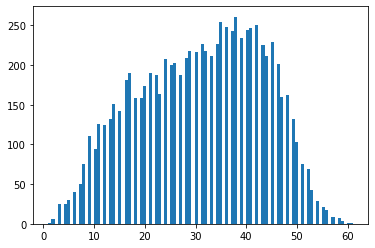

In [ ]:
plt.hist(len_tweet,bins=100)
plt.show()

In [ ]:
max_length = max(len_tweet)
max_length

61

In [ ]:
# Tweets with more than 50 words
count = 0
for x in len_tweet:
    if x>50:
        count+=1
count

275

# Downloading Some Libraries

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 234 kB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=0850be3bd7a1b094f0c4c7d0ab9a98e1725f1bcb58aa7cfb244a534fbf3952f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-o8xr71lc/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
!pip install pyLDAvis==2.1.2
!pip install gensim

     |████████████████████████████████| 1.6 MB 8.1 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=b6e2b43609103a2b079be0304a547019baf77b43d11754fded71c66db65adc91
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


# **Tokenization & Stopword Removal & Lemmatization**

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')


In [ ]:
# Creating All the Stopwords
nltk.download('stopwords')
SW = nltk.corpus.stopwords.words('english')

from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

# Custom stopwords
custom_stopwords = ['i']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)

print(len(ALL_STOP_WORDS))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
418


In [ ]:
# Creating Lemmatizer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Tokenization and Stopword Removal and Lemmatization

All_tweet_token=[]

for tweet in Cleaned_Tweets:
  tweet_token=[]
  for word in tweet.split():
    if word.lower() not in ALL_STOP_WORDS:
      w = lemmatizer.lemmatize(word.lower())
      if len(w)<=1:
        continue
      tweet_token.append(w)
  All_tweet_token.append(tweet_token)
# doc = [[lemmatizer.lemmatize(word.lower()) for word in tweet.split() if word.lower() not in ALL_STOP_WORDS] for tweet in Cleaned_Tweets]
print(All_tweet_token)

[['sir', 'care', 'wish', 'tou', 'good', 'health', 'look', 'forward', 'action', 'covid19', 'ahmedabad'], ['saw', 'beautiful', 'rainbow', 'today', 'opposite', 'gorgeous', 'sun', 'overwhelmed', 'nature', 'beauty', 'simplejoys', 'rainbowindelhi', 'workfromhome', 'nature', 'dopamine'], ['india', 'unemployment', 'rate', 'soar', '2711', 'week', 'ended', 'say', 'cmiein', 'helpless', 'jobless', 'situation', 'assurance', 'fci', 'lighten', 'dull', 'life', 'india', 'fcireleaseag3appointmentletter'], ['goi', 'allow', 'rpsl', 'co', 'work', '50', 'staff', 'amp', 'social', 'distancing', 'asap', 'placement', 'indian', 'seafarer', 'start', 'india', 'brain', 'storm', 'issue', 'act', 'seafarer', 'interest', 'indian', 'seafarer', 'dont', 'loose', 'job'], ['unemployment', 'expected', 'return', '233', 'april', '775', 'february', 'lockdown', 'announced', 'come', '745', 'july', 'bit', 'ray', 'hope', 'lost', 'job', 'corona', 'era', 'trying', 'find', 'new', 'job'], ['pm', 'openly', 'lieing', 'complete', 'lockdow

In [ ]:
len(All_Indian_tweets)

8914

# **Topic Modelling**

In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint


In [ ]:
# Create a id2word dictionary
id2word = Dictionary(All_tweet_token)
print(len(id2word))

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
# no_below=2 filter out words appearing less than 2 times. - int
# no_above=.99 filter out words appearing in more than 99% of all documents - float
print(len(id2word))

# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in All_tweet_token]

26841
8869


In [ ]:
corpus[8000:]

[[(8, 1),
  (22, 1),
  (23, 1),
  (39, 1),
  (123, 1),
  (147, 1),
  (237, 1),
  (434, 1),
  (509, 1),
  (1930, 1),
  (2021, 1),
  (2056, 1),
  (2138, 1),
  (2171, 1),
  (2536, 1),
  (2869, 1),
  (2909, 1),
  (3545, 1),
  (4134, 1),
  (5108, 1),
  (8273, 1)],
 [(34, 1),
  (52, 1),
  (166, 1),
  (354, 1),
  (364, 1),
  (562, 1),
  (838, 1),
  (1287, 1),
  (1318, 1),
  (1332, 1),
  (1466, 1),
  (1670, 1),
  (3113, 1),
  (3454, 1),
  (5180, 1),
  (7604, 1)],
 [(90, 1),
  (118, 1),
  (128, 1),
  (139, 3),
  (236, 2),
  (392, 1),
  (920, 1),
  (1143, 1),
  (1205, 2),
  (1984, 1),
  (2685, 2),
  (3397, 1),
  (3452, 1),
  (5375, 1),
  (5571, 1)],
 [(309, 1), (736, 2), (1023, 1), (1064, 1), (1684, 2), (1711, 1), (5376, 1)],
 [(52, 1),
  (123, 1),
  (141, 1),
  (147, 1),
  (186, 1),
  (223, 1),
  (270, 1),
  (426, 1),
  (1292, 1),
  (1600, 1),
  (5665, 1)],
 [(3, 1),
  (22, 2),
  (23, 1),
  (118, 1),
  (306, 1),
  (414, 1),
  (418, 1),
  (1731, 1),
  (5465, 1)],
 [(18, 1),
  (22, 2),
  (64, 1),

Previous Versions

In [ ]:
# Instantiating a Base LDA model 
base_model = LdaModel(corpus, num_topics=16, id2word = id2word, passes=40, iterations=200, eval_every = None)

# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

# Create Topics
topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
worklife way covid19 story need kolkata word effect system technology

------ Topic 1 ------
india jobless people sir help flight job indian money amp

------ Topic 2 ------
covid19 india workfromhome coronavirus amp lockdown stayhome staysafe socialdistancing covid19india

------ Topic 3 ------
amp india lockdown migrant jobless govt worker day news new

------ Topic 4 ------
india china government lockdown corona pandemic worklifeindia amp indian option

------ Topic 5 ------
work home india working service company time internet office employee

------ Topic 6 ------
social amp workfromhome wfh distancing covid19 new day opportunity stay

------ Topic 7 ------
covid 19 india lockdown warrior covid19 film father affected air

------ Topic 8 ------
india jobless people country million corona world covid19 lockdown govt

------ Topic 9 ------
amp covid19 india corona lockdown unemployment coronavirus student worker pandemic

------ Topic 10 ------
india help covid 

In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=All_tweet_token, 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

In [ ]:
#Creating Topic Distance Visualization 
import pyLDAvis
# from pyLDAvis.gensim_models import prepare
from pyLDAvis import gensim
import gensim

pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(base_model, corpus, id2word)

p

In [ ]:
fname = '/content/drive/MyDrive/1 Work Life Balance/Topic Models/'+'Tuned 16 Topics.model'  

In [ ]:
base_model.save(fname)

In [ ]:
type(id2word)

NameError: ignored

In [ ]:
n=23  # Number of Topics
fname = '/content/drive/MyDrive/1 Work Life Balance/Topic Models/HyperParameters/hyper'+str(n)+'Topics.model' 

In [ ]:
from gensim import models
model =  models.LdaModel.load(fname)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
#Creating Topic Distance Visualization 
import pyLDAvis
# from pyLDAvis.gensim_models import prepare
from pyLDAvis import gensim
import gensim
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(model, corpus, id2word)


# # Filtering for words 
# words = [re.findall(r'"([^"]*)"',t[1]) for t in model.print_topics()]

# # Create Topics
# topics = [' '.join(t[0:10]) for t in words]

# # Getting the topics
# for id, t in enumerate(topics): 
#     print(f"------ Topic {id} ------")
#     print(t, end="\n\n")

# Values of lambda that are very close to zero will show terms that are more 
# specific for a chosen topic. Meaning that you will see terms that are "important" 
# for that specific topic but not necessarily "important" for the whole corpus.

'''
When lamda is tending to zero then it shows the words which are appearing only in this topic, so they kind of best represent the topic
'''


'''
Whereas when lamda is one it gives words that have highest ratio between frequency of the terms for that specific topic and the 
 overall frequency of the terms from the corpus.
'''

# Values of lambda that are very close to one will show those terms that have the 
# highest ratio between frequency of the terms for that specific topic and the 
# overall frequency of the terms from the corpus.

p

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
22    -0.054643  0.201511       1        1  9.828465
10    -0.321107 -0.003076       2        1  7.789664
1      0.080770  0.099901       3        1  6.985988
13    -0.257480 -0.059968       4        1  6.202733
18     0.072110 -0.081768       5        1  4.792088
4     -0.065268 -0.141770       6        1  4.741521
2      0.008057  0.056524       7        1  4.563798
6     -0.118714 -0.188367       8        1  4.492489
20    -0.027991 -0.068529       9        1  4.353621
14    -0.066898  0.118816      10        1  4.301800
17     0.033232 -0.036889      11        1  3.947254
5      0.099834 -0.049872      12        1  3.915361
9      0.017345  0.245339      13        1  3.773330
15     0.028302  0.093213      14        1  3.718333
16     0.004909  0.015371      15        1  3.532562
19    -0.070064  0.055872      16        1  3.333039
21     0.030673  0.033109      17        1  3.175265
12     0.084962  0.017601      18        1  3.170827
8      0.112419 -0.064088      19        1  3.020542
3      0.048301 -0.038812      20        1  2.902576
7      0.134889 -0.055389      21        1  2.821759
0      0.120535 -0.047567      22        1  2.587353
11     0.105828 -0.101163      23        1  2.049630, topic_info=                      Term         Freq        Total Category  logprob  loglift
17                    work  2327.000000  2327.000000  Default  30.0000  30.0000
10                    home  2493.000000  2493.000000  Default  29.0000  29.0000
47                   india  3625.000000  3625.000000  Default  28.0000  28.0000
172                jobless  1026.000000  1026.000000  Default  27.0000  27.0000
129           workfromhome   949.000000   949.000000  Default  26.0000  26.0000
273                 corona  1111.000000  1111.000000  Default  25.0000  25.0000
197                    sir   451.000000   451.000000  Default  24.0000  24.0000
102                  covid   735.000000   735.000000  Default  23.0000  23.0000
176                 people   980.000000   980.000000  Default  22.0000  22.0000
101                   time   840.000000   840.000000  Default  21.0000  21.0000
80                 working   597.000000   597.000000  Default  20.0000  20.0000
171                 indian   362.000000   362.000000  Default  19.0000  19.0000
435                    amp  1269.000000  1269.000000  Default  18.0000  18.0000
112                   case   291.000000   291.000000  Default  17.0000  17.0000
375           unemployment   325.000000   325.000000  Default  16.0000  16.0000
151                    day   724.000000   724.000000  Default  15.0000  15.0000
41                 covid19  1257.000000  1257.000000  Default  14.0000  14.0000
170                   help   585.000000   585.000000  Default  13.0000  13.0000
201                economy   277.000000   277.000000  Default  12.0000  12.0000
114               employee   330.000000   330.000000  Default  11.0000  11.0000
82             coronavirus   479.000000   479.000000  Default  10.0000  10.0000
74                    year   280.000000   280.000000  Default   9.0000   9.0000
846                student   199.000000   199.000000  Default   8.0000   8.0000
73                   virus   257.000000   257.000000  Default   7.0000   7.0000
12                    life   425.000000   425.000000  Default   6.0000   6.0000
277                   stay   276.000000   276.000000  Default   5.0000   5.0000
305               pandemic   476.000000   476.000000  Default   4.0000   4.0000
121                 office   290.000000   290.000000  Default   3.0000   3.0000
226               internet   183.000000   183.000000  Default   2.0000   2.0000
422                country   335.000000   335.000000  Default   1.0000   1.0000
804                  crore    95.226308    96.123831   Topic1  -4.8901   2.3105
274                    die    47.104479    48.002002   Topic1  -5.5940  

In [ ]:
all_topics = {}
lambd = 0.6  # Adjust this accordingly
for i in range(1,n): #Adjust number of topics in final model
    topic = p.topic_info[p.topic_info.Category == 'Topic'+str(i)]
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:20].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
all_topics

{'Topic 1': array(['home', 'work', 'india', 'working', 'employee', 'office',
        'service', 'company', 'internet', 'flight', 'help', 'sir',
        'jobless', 'issue', 'people', 'month', 'network', 'need', 'goi',
        'job'], dtype=object),
 'Topic 2': array(['jobless', 'unemployment', 'india', 'people', 'economy', 'migrant',
        'country', 'million', 'amp', 'modi', 'crisis', 'worker', 'corona',
        'poor', 'pm', 'lockdown', 'job', 'rate', 'crore', 'govt'],
       dtype=object),
 'Topic 3': array(['india', 'student', 'homeschooling', 'covid19', 'exam', 'pandemic',
        'work', 'corona', 'school', 'lockdown', 'stayhomestaysafe', 'home',
        'time', 'people', 'amp', 'start', 'indian', 'study', 'kid', 'year'],
       dtype=object),
 'Topic 4': array(['workfromhome', 'worklife', 'wfh', 'covid19', 'worklifebalance',
        'stayhome', 'workingfromhome', 'lockdown', 'new', 'india', 'video',
        'throwback', 'opportunity', 'share', 'productivity', 'staysafe',
      

In [ ]:
base_model.print_topics()

NameError: ignored

In [ ]:
coherence = []
for k in range(1,30):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=k, id2word = id2word, passes=40,iterations=200, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=All_tweet_token, dictionary=id2word, coherence='c_v')   
    
    fname = '/content/drive/MyDrive/1 Work Life Balance/Topic Models/HyperParameters/'+'hyper'+str(k)+'Topics.model'  
    ldamodel.save(fname)
              
    coherence.append((k,cm.get_coherence()))

Text(0, 0.5, 'Coherence')

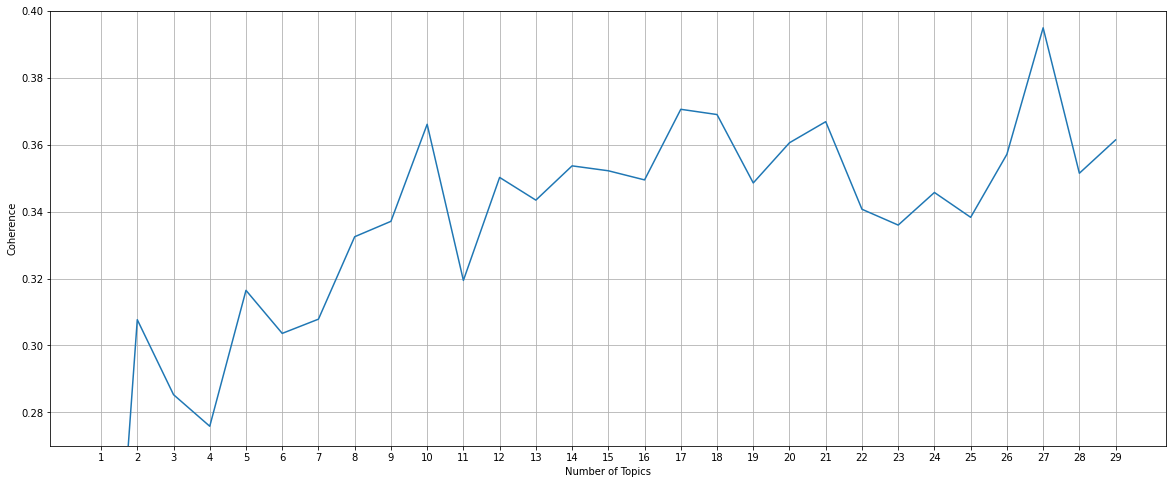

In [ ]:
coh = [coher[1] for coher in coherence]
topic = [topi[0] for topi in coherence]

import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(topic,coh)
plt.xticks(range(1,30))
plt.ylim(0.27,0.4)
plt.xlabel('Number of Topics')
plt.grid()
plt.ylabel('Coherence')

In [ ]:
coherence

[(1, 0.15649601507480176),
 (2, 0.30770063916102425),
 (3, 0.28529117015020594),
 (4, 0.2758430318978483),
 (5, 0.3164676463083337),
 (6, 0.303603060800648),
 (7, 0.3078563849932371),
 (8, 0.33250032559530995),
 (9, 0.3370987271897088),
 (10, 0.3661158277219433),
 (11, 0.3194429313854938),
 (12, 0.35022712816908713),
 (13, 0.3434376904872417),
 (14, 0.35368302009389246),
 (15, 0.3522156420638409),
 (16, 0.34948476637973724),
 (17, 0.37059159203760844),
 (18, 0.36902378237279826),
 (19, 0.34857569880691497),
 (20, 0.36059250092112477),
 (21, 0.3668904066095608),
 (22, 0.34071139705634246),
 (23, 0.3359798746586283),
 (24, 0.34572904502624024),
 (25, 0.33830133255195916),
 (26, 0.35714141057492915),
 (27, 0.3949519597212837),
 (28, 0.3514751814970752),
 (29, 0.3614369331502264)]